## Importing and checking Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## EDA

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

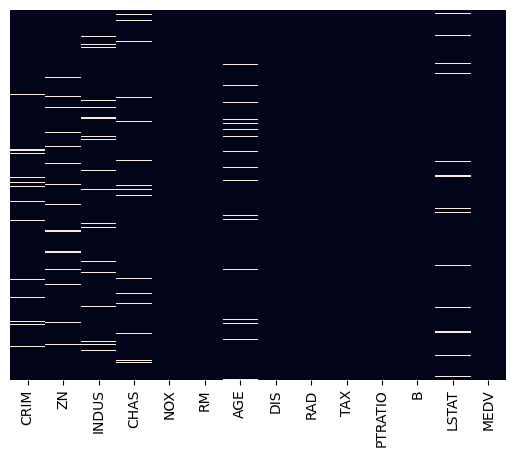

In [7]:
#to map missing entries in the data
sns.heatmap(housing.isnull(), yticklabels=False, cbar=False)

In [ ]:
housing.hist(bins=50, figsize=(40,20))

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

In [ ]:
housing.describe()

## Checking for Correlations

In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

In [ ]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

In [ ]:
housing["LSTATRM"] = housing['LSTAT']/housing['RM']

In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

In [ ]:
housing.plot(kind="scatter", x="LSTATRM", y="MEDV", alpha=0.8)

## Test Train Split

In [ ]:
# Since were are splitting data on basis on CHAS as the data is very imbalance about it, CHAS cannot contian any null values
chas_median = housing['CHAS'].median()
housing['CHAS'].fillna(chas_median, inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
x_train = strat_train_set.drop('MEDV', axis=1)
y_train = strat_train_set['MEDV']

In [ ]:
x_test = strat_test_set.drop('MEDV', axis=1)
y_test = strat_test_set['MEDV']

## Creating Imputer and Standardizer Pipeline

In [ ]:
#imputer to fill all the missing values and scastandardizer to standardize all the values about 0
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
     ("standardizer", StandardScaler())
])

In [ ]:
x_train_prepared = pipeline.fit_transform(x_train) #np array

## Model Building

In [ ]:
#GridSearch for Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
}

grid=GridSearchCV(RandomForestRegressor(), param_grid, verbose=3)
grid.fit(x_train_prepared, y_train)

model = grid.best_estimator_

In [ ]:
grid.best_params_

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
print("Scores:", rmse_scores)
print("Mean: ", rmse_scores.mean())
print("Standard deviation: ", rmse_scores.std())

## Model Testing

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

x_test_prepared = pipeline.transform(x_test)
predictions = model.predict(x_test_prepared)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = explained_variance_score(y_test, predictions)

print("\nMAE: ", mse)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
print("\nR^2: ", r2)

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=predictions, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values (Y Test)")
plt.ylabel("Predicted Values")

## Saving the Model

In [ ]:
from joblib import dump, load
dump(model, 'model.joblib') 

## Usage

In [ ]:
from joblib import dump, load
import numpy as np
model = load('housePrediction.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034, -41.31947]])
model.predict(features)